# Project 5: Retail Analysis with Walmart Data

In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Basic Statistics tasks

In [2]:
# import dataset
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
# Checking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Splitting Date and Create new Columns (Day, Month and Year)
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


# 1. Which store has maximum sales

In [6]:
df_groupby = df.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales".format(df_groupby.idxmax()))
print("Sum of Total Sales = {}".format(df_groupby.max()))

Store Number 20 has maximum Sales
Sum of Total Sales = 301397792.46


# 2. Which store has maximum standard deviation 
## i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
df_std = df.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation".format(df_std['Weekly_Sales'].idxmax()))
print("Standard Deviation = {}".format(df_std['Weekly_Sales'].max()))

Store Number 14 has maximum Standard Deviation
Standard Deviation = 317569.9494755081


In [8]:
df_std = df.groupby('Store').agg({'Weekly_Sales':['mean','std']})
df_std.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

# 3. Which store/s has good quarterly growth rate in Q3’2012

In [9]:
df_Q32012 = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('09-30-2012'))]
df_growth = df_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012".format(df_growth.max()))
print("Quarterly Growth is = {}".format(df_growth.max()))

Store Number 25652119.35 has Good Quartely Growth in Q3'2012
Quarterly Growth is = 25652119.35


# 4. Some holidays have a negative impact on sales
## Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [10]:
df_holiday_sales = df[df['Holiday_Flag'] == 1]
df_nonholiday_sales = df[df['Holiday_Flag'] == 0]

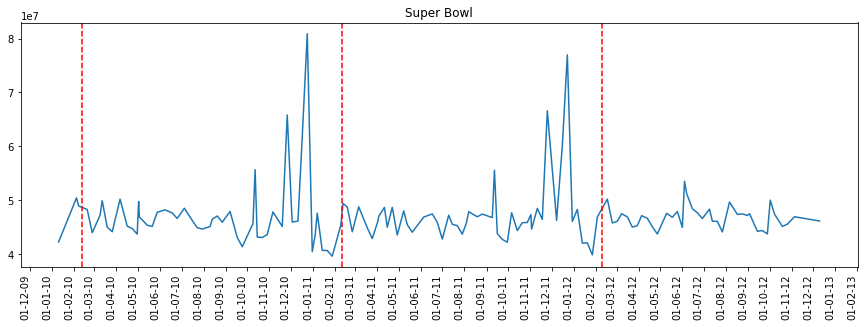

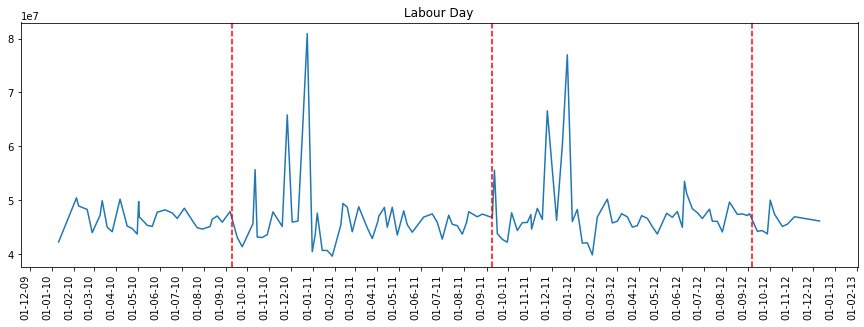

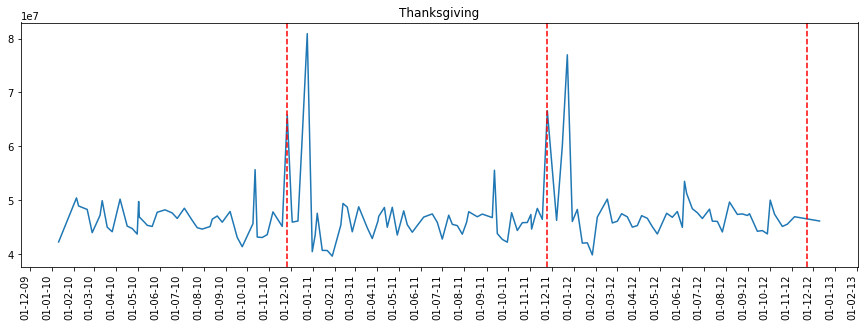

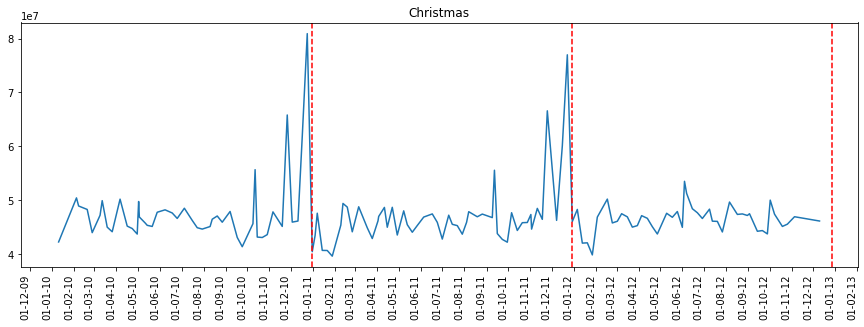

In [11]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

### The Sales increased during Thanksgiving and the sales decreased during Christmas

In [12]:
df.loc[df.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


<AxesSubplot:title={'center':'Yearly Sales in Christmas holiday'}, xlabel='Year'>

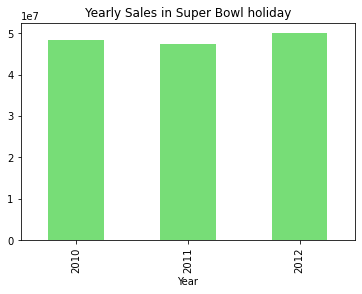

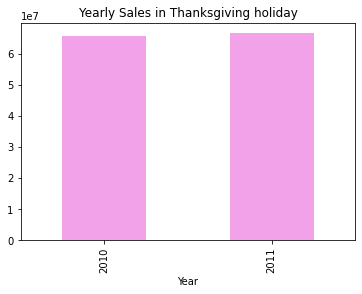

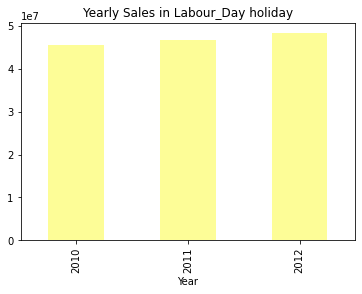

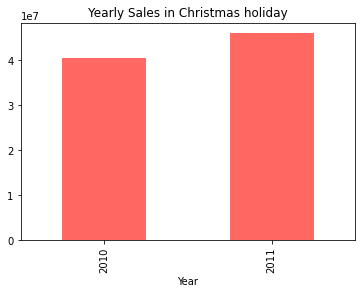

In [13]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(df.loc[df.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(df.loc[df.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday',color='#77DD77')
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday',color='#F2A2E8')
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday',color='#FDFD97')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday',color='#ff6961')

# 5. Provide a monthly and semester view of sales in units and give insights 

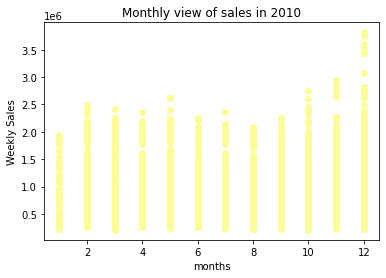

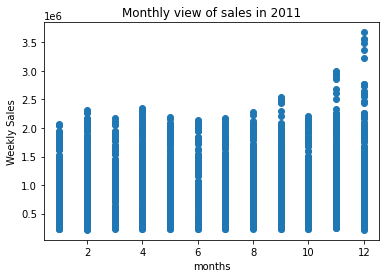

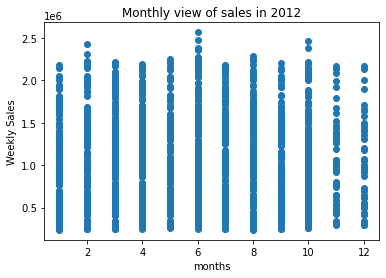

In [14]:
# Monthly view of sales for each years
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"],color='#FDFD97')
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

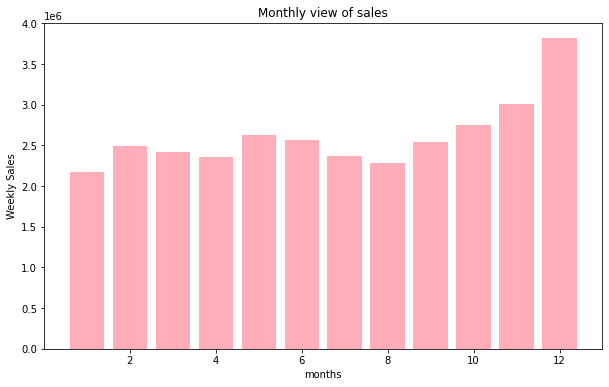

In [35]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(df["Month"],df["Weekly_Sales"],color='#FEADB9')
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 720x432 with 0 Axes>

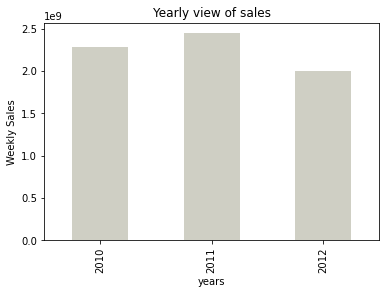

In [34]:
# Yearly view of sales
plt.figure(figsize=(10,6))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',color='#cfcfc4',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

# Statistical Model

### For Store 1 – Build  prediction models to forecast demand

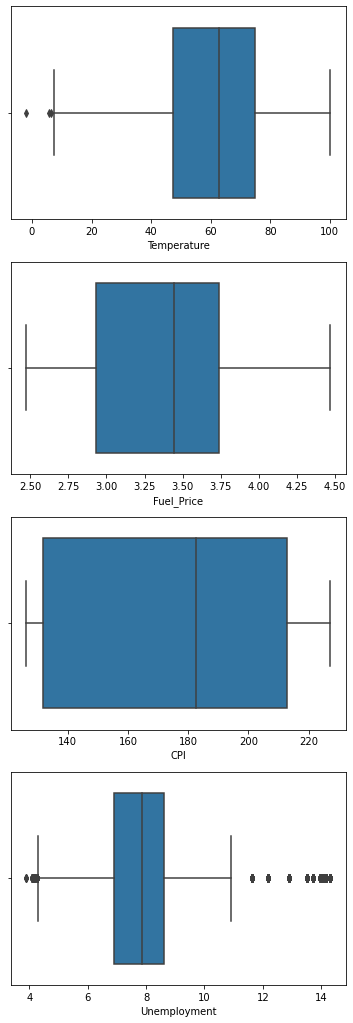

In [17]:
# Find outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

In [18]:
# Drop the outliers
df_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


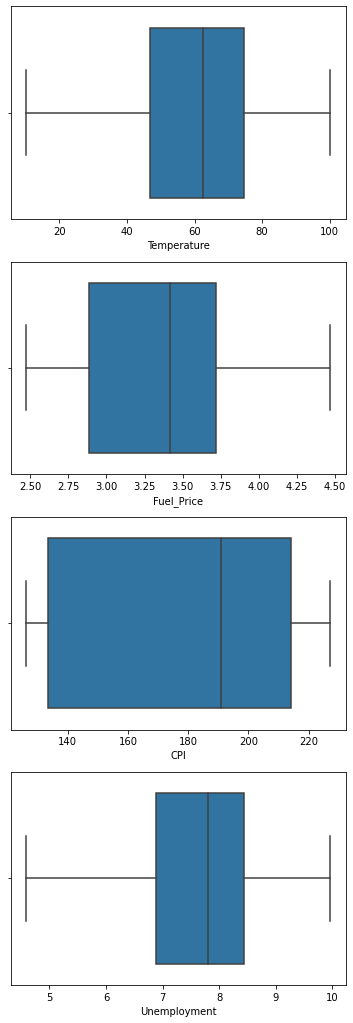

In [19]:
# Check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df_new[column], ax=axs[i])

In [20]:
# Import sklearn libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [21]:
# Select features and target 
X = df_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# 1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
### (starting from the earliest date in order)
### Hypothesize if CPI, unemployment, and fuel price have any impact on sales

Linear Regression:

Accuracy: 12.750539373291758
Mean Absolute Error: 449021.3068400752
Mean Squared Error: 291356640402.2792
Root Mean Squared Error: 539774.6200056827


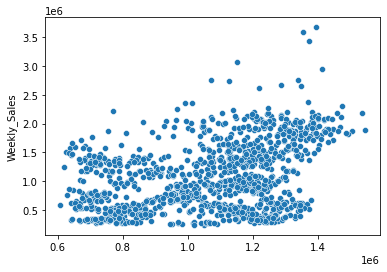

In [39]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 95.50876253647158
Mean Absolute Error: 65194.93311760145
Mean Squared Error: 15102268692.353233
Root Mean Squared Error: 122891.28810600544


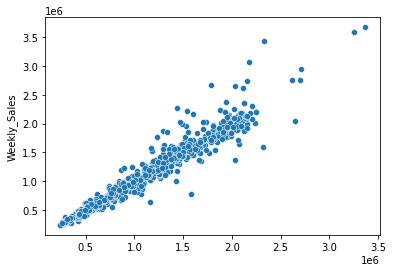

In [23]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

# 2. Change dates into days by creating new variable

In [24]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,5,2010
